<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/SoftwareDesign202010_01/SoftwareDesign202010_0102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SoftwareDesign 2020年10月号第一特集 Pythonではじめる統計学

公式のサンプルコードの写経

## 第2章 平均から始める記述統計

In [1]:
# 基本ライブラリ
import pandas as pd
import numpy as np
import numpy.random as rd
import scipy.stats as st
from tqdm import tqdm
from IPython.display import display

# グラフ描画系
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import seaborn as sns

# plot setting
plt.rcParams["patch.force_edgecolor"] = True
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_style("whitegrid", {'grid.linestyle':'--'})


In [2]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 2.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=86e13f5bcd09b41a7d2a41ed8501ee908e9883007f0962f5ba95d22507fabb98
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [3]:
import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [4]:
np.random.seed(71)
n_data = 1000
height_men = np.random.normal(loc=171.4, scale=5.8, size=n_data)
height_women = np.random.normal(loc=157.5, scale=5.4, size=n_data)

* 図1 身長データのヒストグラム

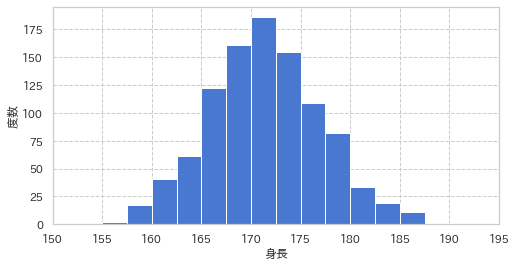

In [5]:
# コード1: pythonでヒストグラム描画
plt.figure(figsize=(8,4))
plt.hist(height_men, bins=np.arange(150, 195, 2.5),)
plt.xlim(150, 195)
plt.ylabel("度数")
plt.xlabel("身長")
plt.show()

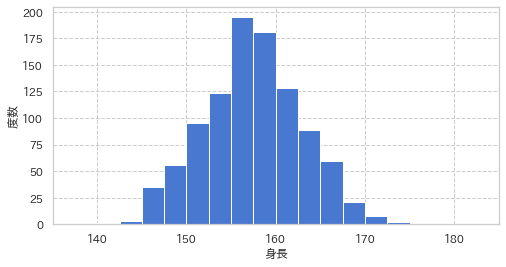

In [6]:
plt.figure(figsize=(8,4))
plt.hist(height_women, bins=np.arange(135, 185, 2.5),)
plt.xlim(135, 185)
plt.ylabel("度数")
plt.xlabel("身長")
plt.show()

* 図2 2つのデータセットのヒストグラム

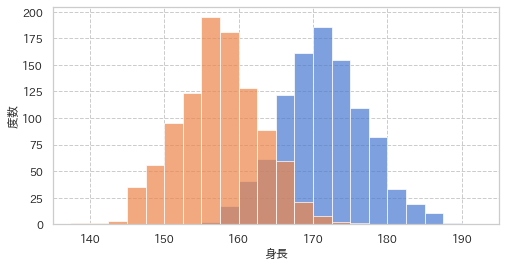

In [7]:
# コード2: pythonでヒストグラム描画
plt.figure(figsize=(8,4))
plt.hist(height_men, bins=np.arange(140, 200, 2.5), alpha=0.7, label="男性")
plt.hist(height_women, bins=np.arange(135, 180, 2.5), alpha=0.7, label="女性")
plt.xlim(135, 195)
plt.ylabel("度数")
plt.xlabel("身長")
plt.show()

* 図３ 総和記号への書き換え

1000人分の合計
$$
\begin{align}
 &= x_1 + x_2 + x_3 + \dotsc + x_{999} + x_{1000} \\
 &= \sum_{i=1}^{1000} x_i
 \end{align}
$$




In [8]:
# コード3: 総和記号がやっていることをpythonコードで表す
height_sum = 0
for i in range(len(height_men)):
  height_sum += height_men[i]
print(height_sum)

171409.2829305438


In [9]:
# exp関数
print(np.e)

2.718281828459045


### exp関数

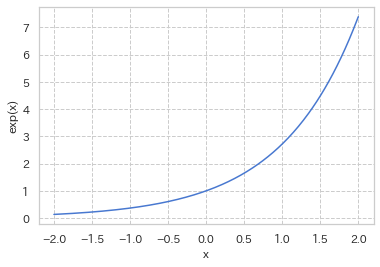

In [11]:
# コード4: exp(x)のグラフ描画
x = np.linspace(-2, 2, 301)
plt.plot(x, np.exp(x))
plt.ylabel("exp(x)")
plt.xlabel("x")
plt.show()

### 平均

In [12]:
# コード5: 平均の計算のpython コード
sum_val = 0
n = len(x)
for i in range(n):
  sum_val += x[i]
mean_val = sum_val / n
print(mean_val)

1.0327656043024712e-17


### 平均値の特性

In [15]:
def plot_mean(x, xlim):
  m = np.mean(x)
  plt.figure(figsize=(13,2))
  plt.scatter(x, np.zeros_like(x), s=50, zorder=100)
  plt.scatter(m, [0], s=100, c="r", zorder=100)

  for i in range((len(x))):
    plt.text(x[i], -0.3, f"x{i+1}", size=12)
    plt.text(x[i], -0.5, f"={x[i]}", size=12)
  
  plt.text(m, -0.3, "average", size=12)
  plt.text(m, -0.6, f"={m:.1f}", size=12)
  plt.plot([0,100], [0,0], c="K", zorder=10)

  plt.yticks([])
  plt.xlim(xlim)
  plt.ylim(-1,1)
  plt.xlabel("test score")
  plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


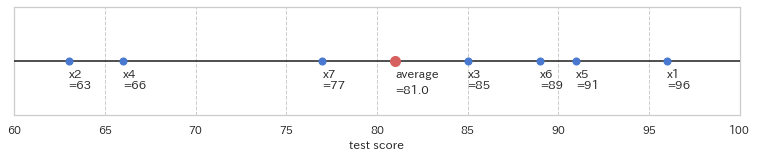

In [16]:
x = [96, 63, 85, 66, 91, 89, 77]
plot_mean(x, xlim=(60, 100))